1. What is Logistic Regression, and how does it differ from Linear Regression?
Logistic Regression is a classification algorithm used for binary outcomes, while Linear Regression is used for continuous outcomes. Logistic Regression uses a sigmoid function to output probabilities, unlike Linear Regression which directly models the relationship between independent and dependent variables.

2. What is the mathematical equation of Logistic Regression?
The core of Logistic Regression is the sigmoid function:


3. Why do we use the Sigmoid function in Logistic Regression?
The Sigmoid function squashes any real-valued number into a probability between 0 and 1, making it suitable for binary classification tasks by interpreting the output as the likelihood of belonging to a certain class.

4. What is the cost function of Logistic Regression?
The cost function for Logistic Regression is typically the log-loss (or cross-entropy loss), which penalizes incorrect probabilistic predictions.

5. What is Regularization in Logistic Regression? Why is it needed?
Regularization prevents overfitting by adding a penalty to the cost function based on the magnitude of the coefficients. It helps create a more generalized model.

6. Explain the difference between Lasso, Ridge, and Elastic Net regression.
Lasso (L1) adds an L1 penalty, encouraging sparsity (some coefficients become zero). Ridge (L2) adds an L2 penalty, shrinking coefficients towards zero. Elastic Net combines both L1 and L2 penalties.

7. When should we use Elastic Net instead of Lasso or Ridge?
Elastic Net is preferred when there are many correlated features, as it can select groups of correlated variables, unlike Lasso which might arbitrarily pick one. It also handles the limitations of Ridge and Lasso.

8. What is the impact of the regularization parameter (λ) in Logistic Regression?
The regularization parameter (λ) controls the strength of the penalty. A higher λ increases the penalty, leading to smaller coefficients and a simpler model, potentially reducing overfitting.

9. What are the key assumptions of Logistic Regression?
Key assumptions include linearity of independent variables with the log-odds, independence of errors, and absence of multicollinearity.

10. What are some alternatives to Logistic Regression for classification tasks?
Alternatives include Support Vector Machines (SVMs), Decision Trees, Random Forests, Gradient Boosting Machines (GBMs), K-Nearest Neighbors (KNN), and Neural Networks.

11. What are Classification Evaluation Metrics?
Classification evaluation metrics measure a model's performance. Common ones include accuracy, precision, recall, F1-score, ROC-AUC, and confusion matrix.

12. How does class imbalance affect Logistic Regression?
Class imbalance can lead to a biased model that performs well on the majority class but poorly on the minority class, as the model optimizes for overall accuracy.

13. What is Hyperparameter Tuning in Logistic Regression?
Hyperparameter tuning involves finding the optimal values for parameters not learned from the data (e.g., regularization strength 'C', solver) to maximize model performance.

14. What are different solvers in Logistic Regression? Which one should be used?
Common solvers include 'liblinear', 'newton-cg', 'lbfgs', 'sag', and 'saga'. The choice depends on the dataset size and regularization type; 'liblinear' is good for small datasets, while 'saga' handles L1, L2, and Elastic-Net.

15. How is Logistic Regression extended for multiclass classification?
Logistic Regression is extended for multiclass classification primarily using One-vs-Rest (OvR) or Softmax (multinomial logistic regression).

16. What are the advantages and disadvantages of Logistic Regression?
Advantages include simplicity, interpretability, and efficiency. Disadvantages include the assumption of linearity between independent variables and log-odds, and sensitivity to outliers.

17. What are some use cases of Logistic Regression?
Common use cases include spam detection, disease prediction (e.g., diabetes), customer churn prediction, and credit scoring.

18. What is the difference between Softmax Regression and Logistic Regression?
Logistic Regression is for binary classification, outputting a single probability. Softmax Regression (multinomial logistic regression) extends this for multiclass classification, outputting probabilities for multiple classes.

19. How do we choose between One-vs-Rest (OvR) and Softmax for multiclass classification?
OvR trains a binary classifier for each class, useful when classes are independent. Softmax trains a single model for all classes, suitable when classes are mutually exclusive.

20. How do we interpret coefficients in Logistic Regression?
The coefficients represent the change in the log-odds of the dependent variable for a one-unit increase in the independent variable, holding others constant. Exponentiating them gives the odds ratio.

In [1]:
# 1.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

y_binary = (y == 0).astype(int)


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)

# Apply Logistic Regression
model = LogisticRegression(max_iter=1000) # Increased max_iter for convergence
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 1.0000


In [2]:
#2.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load your dataset (similar to question 1)
# --- DEMO DATA ---
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
y_binary = (y == 0).astype(int)
# --- END DEMO DATA ---

X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)


model_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
model_l1.fit(X_train, y_train)

# Make predictions
y_pred_l1 = model_l1.predict(X_test)

# Print accuracy
accuracy_l1 = accuracy_score(y_test, y_pred_l1)
print(f"Model Accuracy with L1 Regularization: {accuracy_l1:.4f}")

Model Accuracy with L1 Regularization: 1.0000


In [4]:
#3.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
y_binary = (y == 0).astype(int)
# --- END DEMO DATA ---

X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)


model_l2 = LogisticRegression(penalty='l2', max_iter=1000)
model_l2.fit(X_train, y_train)

# Make predictions
y_pred_l2 = model_l2.predict(X_test)

# Print accuracy
accuracy_l2 = accuracy_score(y_test, y_pred_l2)
print(f"Model Accuracy with L2 Regularization: {accuracy_l2:.4f}")

# Print coefficients
print("Model Coefficients (L2 Regularization):")
for i, coef in enumerate(model_l2.coef_[0]):
    print(f"Feature {i}: {coef:.4f}")
print(f"Intercept: {model_l2.intercept_[0]:.4f}")

Model Accuracy with L2 Regularization: 1.0000
Model Coefficients (L2 Regularization):
Feature 0: -0.4311
Feature 1: 0.8457
Feature 2: -2.1566
Feature 3: -0.8894
Intercept: 6.1394


In [5]:
#4.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
y_binary = (y == 0).astype(int)


X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)

model_elasticnet = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=1000)
model_elasticnet.fit(X_train, y_train)

# Make predictions
y_pred_elasticnet = model_elasticnet.predict(X_test)

# Print accuracy
accuracy_elasticnet = accuracy_score(y_test, y_pred_elasticnet)
print(f"Model Accuracy with Elastic Net Regularization: {accuracy_elasticnet:.4f}")
print("Model Coefficients (Elastic Net Regularization):")
for i, coef in enumerate(model_elasticnet.coef_[0]):
    print(f"Feature {i}: {coef:.4f}")

Model Accuracy with Elastic Net Regularization: 1.0000
Model Coefficients (Elastic Net Regularization):
Feature 0: 0.0000
Feature 1: 1.1403
Feature 2: -2.3978
Feature 3: -0.5140


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [6]:
#5.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target # This is already multiclass (0, 1, 2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model_ovr = LogisticRegression(multi_class='ovr', solver='liblinear', max_iter=1000)
model_ovr.fit(X_train, y_train)

# Make predictions
y_pred_ovr = model_ovr.predict(X_test)

# Print accuracy
accuracy_ovr = accuracy_score(y_test, y_pred_ovr)
print(f"Multiclass Model Accuracy (OvR): {accuracy_ovr:.4f}")

Multiclass Model Accuracy (OvR): 0.9778


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [7]:
#6.
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
y_binary = (y == 0).astype(int)


X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)


param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'] # 'liblinear' supports 'l1' and 'l2' for binary classification
}

# Create a Logistic Regression model instance
log_reg = LogisticRegression(max_iter=1000)

# Apply GridSearchCV
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Training Accuracy (from GridSearchCV): {grid_search.best_score_:.4f}")

# Evaluate on the test set with the best estimator
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)
test_accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"Test Accuracy with Tuned Hyperparameters: {test_accuracy_tuned:.4f}")

Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Training Accuracy (from GridSearchCV): 1.0000
Test Accuracy with Tuned Hyperparameters: 1.0000


In [8]:
#7.
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

# Load your dataset
# --- DEMO DATA ---
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
y_binary = (y == 0).astype(int)
# --- END DEMO DATA ---


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracies = []

# Perform cross-validation
for train_index, test_index in skf.split(X, y_binary):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_binary[train_index], y_binary[test_index]

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

average_accuracy = np.mean(accuracies)
print(f"Average Accuracy with Stratified K-Fold CV: {average_accuracy:.4f}")
print(f"Accuracies per fold: {accuracies}")

Average Accuracy with Stratified K-Fold CV: 1.0000
Accuracies per fold: [1.0, 1.0, 1.0, 1.0, 1.0]


In [10]:
#8. import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


try:
    df = pd.read_csv('your_dataset.csv')
except FileNotFoundError:
    print("Error: 'your_dataset.csv' not found. Please provide a valid CSV file.")

    from sklearn.datasets import make_classification
    X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)
    df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(10)])
    df['target'] = y
    print("Using a dummy dataset for demonstration.")


if 'target' in df.columns: # Check if 'target' exists (from dummy data)
    X = df.drop('target', axis=1)
    y = df['target']
else: # If using a real CSV, replace 'your_target_column_name'
    print("Please specify your target column name in the code.")

    exit()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on CSV Dataset: {accuracy:.4f}")

Error: 'your_dataset.csv' not found. Please provide a valid CSV file.
Using a dummy dataset for demonstration.
Accuracy on CSV Dataset: 0.8467


In [11]:
#9.
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy.stats import uniform, randint

# Load your dataset
# --- DEMO DATA ---
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
y_binary = (y == 0).astype(int)
# --- END DEMO DATA ---

X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)

# Define the parameter distributions for RandomizedSearchCV
param_distributions = {
    'C': uniform(loc=0, scale=4), # C values from 0 to 4
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': randint(100, 1000)
}


log_reg = LogisticRegression()


random_search = RandomizedSearchCV(log_reg, param_distributions, n_iter=20, cv=5,
                                   scoring='accuracy', random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Training Accuracy (from RandomizedSearchCV): {random_search.best_score_:.4f}")

# Evaluate on the test set with the best estimator
best_model_rs = random_search.best_estimator_
y_pred_rs = best_model_rs.predict(X_test)
test_accuracy_rs = accuracy_score(y_test, y_pred_rs)
print(f"Test Accuracy with Tuned Hyperparameters (RandomizedSearch): {test_accuracy_rs:.4f}")

Best Parameters: {'C': np.float64(1.49816047538945), 'max_iter': 960, 'penalty': 'l1', 'solver': 'liblinear'}
Best Training Accuracy (from RandomizedSearchCV): 1.0000
Test Accuracy with Tuned Hyperparameters (RandomizedSearch): 1.0000


In [12]:
#10.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score

# Load a multiclass dataset (e.g., Iris for its 3 classes)
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target # Multiclass target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

estimator = LogisticRegression(max_iter=1000, solver='liblinear')
ovo_model = OneVsOneClassifier(estimator)
ovo_model.fit(X_train, y_train)

# Make predictions
y_pred_ovo = ovo_model.predict(X_test)

# Print accuracy
accuracy_ovo = accuracy_score(y_test, y_pred_ovo)
print(f"Multiclass Model Accuracy (One-vs-One): {accuracy_ovo:.4f}")

Multiclass Model Accuracy (One-vs-One): 1.0000


Confusion Matrix:
[[ 59   4]
 [  2 106]]


<Figure size 800x600 with 0 Axes>

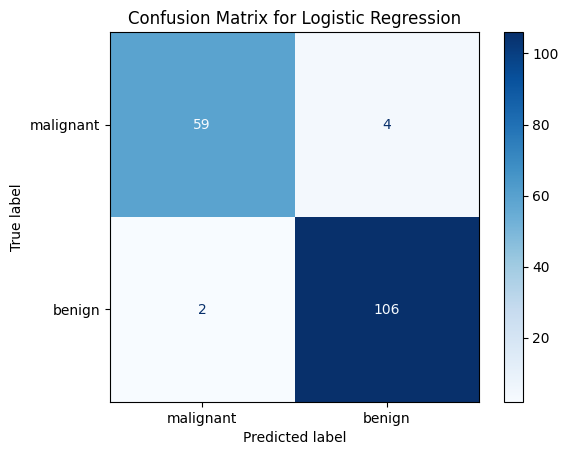

In [14]:
#11.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
# --- END DEMO DATA ---

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(max_iter=5000, solver='liblinear') # Increased max_iter for convergence
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cancer.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [15]:
#12.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Load a dataset suitable for binary classification
# --- DEMO DATA ---
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
# --- END DEMO DATA ---

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(max_iter=5000, solver='liblinear')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate using Precision, Recall, and F1-Score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.9649
Precision: 0.9636
Recall: 0.9815
F1-Score: 0.9725


In [16]:
#13.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from collections import Counter
from sklearn.datasets import make_classification # For creating imbalanced data

# Create an imbalanced dataset for demonstration
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2,
                           weights=[0.95, 0.05], random_state=42, flip_y=0) # 95% majority, 5% minority

print(f"Original class distribution: {Counter(y)}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) # Stratify to maintain imbalance

# --- Model without class weights ---
print("\n--- Model without Class Weights ---")
model_no_weights = LogisticRegression(max_iter=1000, solver='liblinear')
model_no_weights.fit(X_train, y_train)
y_pred_no_weights = model_no_weights.predict(X_test)
print(f"Accuracy (no weights): {accuracy_score(y_test, y_pred_no_weights):.4f}")
print("Classification Report (no weights):")
print(classification_report(y_test, y_pred_no_weights))

# --- Model with class weights ---
print("\n--- Model with Class Weights ---")
# 'balanced' automatically adjusts weights inversely proportional to class frequencies
model_with_weights = LogisticRegression(max_iter=1000, solver='liblinear', class_weight='balanced')
model_with_weights.fit(X_train, y_train)
y_pred_with_weights = model_with_weights.predict(X_test)
print(f"Accuracy (with weights): {accuracy_score(y_test, y_pred_with_weights):.4f}")
print("Classification Report (with weights):")
print(classification_report(y_test, y_pred_with_weights))

Original class distribution: Counter({np.int64(0): 950, np.int64(1): 50})

--- Model without Class Weights ---
Accuracy (no weights): 0.9700
Classification Report (no weights):
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       285
           1       0.88      0.47      0.61        15

    accuracy                           0.97       300
   macro avg       0.92      0.73      0.80       300
weighted avg       0.97      0.97      0.97       300


--- Model with Class Weights ---
Accuracy (with weights): 0.9100
Classification Report (with weights):
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       285
           1       0.32      0.73      0.45        15

    accuracy                           0.91       300
   macro avg       0.65      0.83      0.70       300
weighted avg       0.95      0.91      0.93       300



In [18]:
#14,
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

try:
    df_titanic = pd.read_csv('titanic.csv')
except FileNotFoundError:
    print("Error: 'titanic.csv' not found. Please download it (e.g., from Kaggle) and place it in the same directory.")
    print("Using a dummy dataset for demonstration purposes as Titanic is not available.")
    # Dummy data if Titanic is not found
    from sklearn.datasets import make_classification
    X_dummy, y_dummy = make_classification(n_samples=500, n_features=5, n_classes=2, random_state=42)
    df_titanic = pd.DataFrame(X_dummy, columns=['col1', 'col2', 'col3', 'col4', 'col5'])
    df_titanic['Survived'] = y_dummy
    df_titanic['Sex'] = ['male'] * 250 + ['female'] * 250
    df_titanic['Age'] = df_titanic['col1'] * 10 + 20 # Example Age
    df_titanic['Embarked'] = ['S'] * 400 + ['C'] * 50 + ['Q'] * 50
    df_titanic.loc[10:20, 'Age'] = None # Introduce some missing values
    df_titanic.loc[25:30, 'Embarked'] = None
    print("Using a dummy dataset (Titanic-like structure) for demonstration.")


if 'Survived' in df_titanic.columns:
    X = df_titanic.drop('Survived', axis=1)
    y = df_titanic['Survived']
else:
    print("Target column 'Survived' not found. Please check your dataset.")
    exit()

# Select relevant features (simplistic selection for demonstration)
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = X[features]

numeric_features = ['Age', 'Fare', 'SibSp', 'Parch', 'Pclass']
categorical_features = ['Sex', 'Embarked']

# Create preprocessing pipelines for numerical and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the full pipeline with preprocessing and Logistic Regression
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', LogisticRegression(max_iter=1000, solver='liblinear'))])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model_pipeline.fit(X_train, y_train)

# Make predictions
y_pred = model_pipeline.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Titanic Dataset: {accuracy:.4f}")
print("Classification Report on Titanic Dataset:")
print(classification_report(y_test, y_pred))

Error: 'titanic.csv' not found. Please download it (e.g., from Kaggle) and place it in the same directory.
Using a dummy dataset for demonstration purposes as Titanic is not available.
Using a dummy dataset (Titanic-like structure) for demonstration.


KeyError: "['Pclass', 'SibSp', 'Parch', 'Fare'] not in index"

In [19]:
#15.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Load a dataset
# --- DEMO DATA ---
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
# --- END DEMO DATA ---

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- Model without Scaling ---
print("--- Model without Feature Scaling ---")
model_no_scaling = LogisticRegression(max_iter=5000, solver='liblinear')
model_no_scaling.fit(X_train, y_train)
y_pred_no_scaling = model_no_scaling.predict(X_test)
accuracy_no_scaling = accuracy_score(y_test, y_pred_no_scaling)
print(f"Accuracy without Scaling: {accuracy_no_scaling:.4f}")

# --- Model with Scaling (Standardization) ---
print("\n--- Model with Feature Scaling (Standardization) ---")
# Create a pipeline with StandardScaler and Logistic Regression
model_with_scaling = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression(max_iter=5000, solver='liblinear'))
])
model_with_scaling.fit(X_train, y_train)
y_pred_with_scaling = model_with_scaling.predict(X_test)
accuracy_with_scaling = accuracy_score(y_test, y_pred_with_scaling)
print(f"Accuracy with Scaling: {accuracy_with_scaling:.4f}")

print("\n--- Comparison ---")
print(f"Accuracy difference (Scaled - No Scaling): {accuracy_with_scaling - accuracy_no_scaling:.4f}")

--- Model without Feature Scaling ---
Accuracy without Scaling: 0.9649

--- Model with Feature Scaling (Standardization) ---
Accuracy with Scaling: 0.9825

--- Comparison ---
Accuracy difference (Scaled - No Scaling): 0.0175


ROC-AUC Score: 0.9978


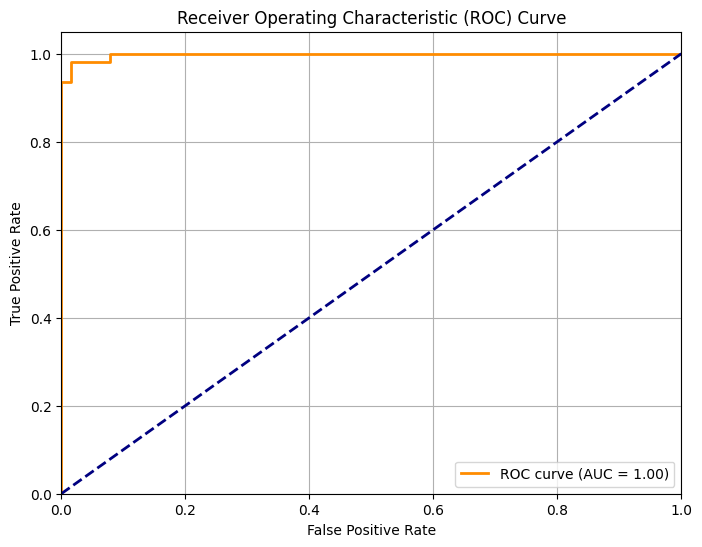

In [20]:
#16.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load a dataset suitable for binary classification
# --- DEMO DATA ---
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
# --- END DEMO DATA ---

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(max_iter=5000, solver='liblinear')
model.fit(X_train, y_train)

# Get predicted probabilities for the positive class (class 1)
y_proba = model.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [21]:
#17.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load a dataset
# --- DEMO DATA ---
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
# --- END DEMO DATA ---

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Logistic Regression with a custom C value (regularization strength)
# C is the inverse of regularization strength. Smaller C means stronger regularization.
custom_C = 0.5
model_custom_c = LogisticRegression(C=custom_C, max_iter=5000, solver='liblinear')
model_custom_c.fit(X_train, y_train)

# Make predictions
y_pred_custom_c = model_custom_c.predict(X_test)

# Print accuracy
accuracy_custom_c = accuracy_score(y_test, y_pred_custom_c)
print(f"Model Accuracy with C={custom_C}: {accuracy_custom_c:.4f}")

Model Accuracy with C=0.5: 0.9649


In [23]:
#18.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np

# Load a dataset
# --- DEMO DATA ---
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
feature_names = cancer.feature_names # Get feature names
# --- END DEMO DATA ---

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = LogisticRegression(max_iter=5000, solver='liblinear', C=1.0) # Default C=1.0

model.fit(X_train, y_train)

coefficients = model.coef_[0]

# Create a DataFrame for better visualization
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort by absolute coefficient value to identify importance
coef_df['Abs_Coefficient'] = np.abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

print("Important Features based on Logistic Regression Coefficients:")
print(coef_df)

Important Features based on Logistic Regression Coefficients:
                    Feature  Coefficient  Abs_Coefficient
0               mean radius     2.175329         2.175329
26          worst concavity    -1.579345         1.579345
11            texture error     1.403643         1.403643
20             worst radius     1.155193         1.155193
25        worst compactness    -1.139760         1.139760
28           worst symmetry    -0.729143         0.729143
6            mean concavity    -0.655026         0.655026
27     worst concave points    -0.617351         0.617351
5          mean compactness    -0.411271         0.411271
21            worst texture    -0.390328         0.390328
7       mean concave points    -0.350106         0.350106
24         worst smoothness    -0.242144         0.242144
8             mean symmetry    -0.202222         0.202222
1              mean texture     0.159658         0.159658
4           mean smoothness    -0.130413         0.130413
2         

In [25]:
#19.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import cohen_kappa_score, accuracy_score

# Load a dataset suitable for binary classification
# --- DEMO DATA ---
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
# --- END DEMO DATA ---

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(max_iter=5000, solver='liblinear')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate Cohen's Kappa Score
kappa = cohen_kappa_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Cohen's Kappa Score: {kappa:.4f}")



Accuracy: 0.9649
Cohen's Kappa Score: 0.9241


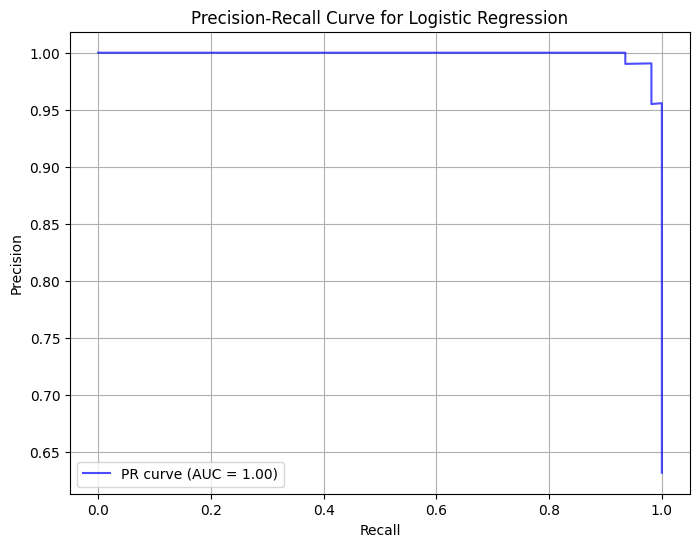

In [26]:
#20.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Load a dataset suitable for binary classification
# --- DEMO DATA ---
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
# --- END DEMO DATA ---

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(max_iter=5000, solver='liblinear')
model.fit(X_train, y_train)

# Get predicted probabilities for the positive class (class 1)
y_proba = model.predict_proba(X_test)[:, 1]

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', alpha=0.7, label=f'PR curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Logistic Regression')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

In [28]:
#21.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load a dataset
# --- DEMO DATA ---
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
# --- END DEMO DATA ---

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

solvers_to_test = ['liblinear', 'lbfgs', 'saga']
results = {}

for solver in solvers_to_test:
    print(f"\n--- Testing Solver: {solver} ---")
    try:

        if solver == 'liblinear':
            model = LogisticRegression(solver=solver, max_iter=5000, penalty='l1') # Example with L1 for liblinear
        else:
            model = LogisticRegression(solver=solver, max_iter=5000, penalty='l2') # Default L2 for others

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results[solver] = accuracy
        print(f"Accuracy with {solver}: {accuracy:.4f}")
    except Exception as e:
        print(f"Could not train with solver {solver}: {e}")
        results[solver] = None # Mark as failed

print("\n--- Comparison of Solvers ---")
for solver, accuracy in results.items():
    if accuracy is not None:
        print(f"Solver '{solver}': Accuracy = {accuracy:.4f}")
    else:
        print(f"Solver '{solver}': Failed to train")


--- Testing Solver: liblinear ---
Accuracy with liblinear: 0.9649

--- Testing Solver: lbfgs ---
Accuracy with lbfgs: 0.9766

--- Testing Solver: saga ---
Accuracy with saga: 0.9649

--- Comparison of Solvers ---
Solver 'liblinear': Accuracy = 0.9649
Solver 'lbfgs': Accuracy = 0.9766
Solver 'saga': Accuracy = 0.9649


In [29]:
#22.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import matthews_corrcoef, accuracy_score

# Load a dataset suitable for binary classification
# --- DEMO DATA ---
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
# --- END DEMO DATA ---

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(max_iter=5000, solver='liblinear')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")


Accuracy: 0.9649
Matthews Correlation Coefficient (MCC): 0.9244


In [30]:
#23.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load a dataset
# --- DEMO DATA ---
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
# --- END DEMO DATA ---

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- Train on Raw Data ---
print("--- Training on Raw Data ---")
model_raw = LogisticRegression(max_iter=5000, solver='liblinear')
model_raw.fit(X_train, y_train)
y_pred_raw = model_raw.predict(X_test)
accuracy_raw = accuracy_score(y_test, y_pred_raw)
print(f"Accuracy on Raw Data: {accuracy_raw:.4f}")

# --- Train on Standardized Data ---
print("\n--- Training on Standardized Data ---")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = LogisticRegression(max_iter=5000, solver='liblinear')
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(f"Accuracy on Standardized Data: {accuracy_scaled:.4f}")

print("\n--- Impact of Feature Scaling ---")
print(f"Accuracy improvement due to scaling: {accuracy_scaled - accuracy_raw:.4f}")
if accuracy_scaled > accuracy_raw:
    print("Feature scaling improved model accuracy.")
elif accuracy_scaled < accuracy_raw:
    print("Feature scaling slightly decreased accuracy (could be due to specific dataset/randomness).")
else:
    print("Feature scaling had no significant impact on accuracy.")

--- Training on Raw Data ---
Accuracy on Raw Data: 0.9649

--- Training on Standardized Data ---
Accuracy on Standardized Data: 0.9825

--- Impact of Feature Scaling ---
Accuracy improvement due to scaling: 0.0175
Feature scaling improved model accuracy.


In [32]:
#24.
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load a dataset
# --- DEMO DATA ---
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
# --- END DEMO DATA ---

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

log_reg = LogisticRegression(solver='liblinear', max_iter=5000)

# Apply GridSearchCV to find the optimal C
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Optimal C found by Cross-Validation: {grid_search.best_params_['C']}")
print(f"Best Training Accuracy with optimal C: {grid_search.best_score_:.4f}")

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred_optimal_c = best_model.predict(X_test)
test_accuracy_optimal_c = accuracy_score(y_test, y_pred_optimal_c)
print(f"Test Accuracy with Optimal C: {test_accuracy_optimal_c:.4f}")

Optimal C found by Cross-Validation: 1000
Best Training Accuracy with optimal C: 0.9673
Test Accuracy with Optimal C: 0.9708


In [33]:
#25.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import joblib # For saving and loading models

# Load a dataset
# --- DEMO DATA ---
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
# --- END DEMO DATA ---

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- 1. Train the Logistic Regression Model ---
print("--- Training Logistic Regression Model ---")
model = LogisticRegression(max_iter=5000, solver='liblinear')
model.fit(X_train, y_train)

# Make initial predictions and get accuracy
y_pred_original = model.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)
print(f"Original Model Accuracy: {accuracy_original:.4f}")

# --- 2. Save the Trained Model ---
model_filename = 'logistic_regression_model.joblib'
joblib.dump(model, model_filename)
print(f"\nModel saved to {model_filename}")

# --- 3. Load the Saved Model ---
print("\n--- Loading Model from Disk ---")
loaded_model = joblib.load(model_filename)
print("Model loaded successfully.")

# --- 4. Make Predictions with the Loaded Model ---
print("--- Making Predictions with Loaded Model ---")
y_pred_loaded = loaded_model.predict(X_test)
accuracy_loaded = accuracy_score(y_test, y_pred_loaded)
print(f"Loaded Model Accuracy: {accuracy_loaded:.4f}")

# Verify that predictions are identical
if np.array_equal(y_pred_original, y_pred_loaded):
    print("\nPredictions from original and loaded models are identical.")
else:
    print("\nPredictions from original and loaded models differ (this is unexpected).")

--- Training Logistic Regression Model ---
Original Model Accuracy: 0.9649

Model saved to logistic_regression_model.joblib

--- Loading Model from Disk ---
Model loaded successfully.
--- Making Predictions with Loaded Model ---
Loaded Model Accuracy: 0.9649

Predictions from original and loaded models are identical.
